In [1]:
import torch
import torchvision
import torchvision.transforms as transforms

In [2]:
#To determine if your system supports CUDA
print("==> Check devices..")
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print("Current device: ",device)


==> Check devices..
Current device:  cuda


In [3]:
print('==> Preparing dataset..')

==> Preparing dataset..


# without data augmentation

In [4]:
"""1.1"""
# The output of torchvision datasets are PILImage images of range [0, 1]
# We transform them to Tensor type
# And normalize the data
# Be sure you do same normalization for your train and test data

#The transform function for train data
transform_train = transforms.Compose([
        transforms.Resize(256),   
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406],
                             std=[0.229, 0.224, 0.225])
])

#The transform function for test data
transform_test = transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406],
                             std=[0.229, 0.224, 0.225])
])

In [5]:
"""1.2""" 

#Use API to load Food-11 train dataset
trainset = torchvision.datasets.ImageFolder(root='/tmp/work/Food-11_03/training', transform=transform_train)

#Use API to load Food-11 test dataset
testset = torchvision.datasets.ImageFolder(root='/tmp/work/Food-11_03/evaluation', transform=transform_test)


In [6]:
"""1.3"""

trainloader = torch.utils.data.DataLoader(trainset, batch_size=32,
shuffle=True, num_workers=2)

testloader = torch.utils.data.DataLoader(testset, batch_size=32,
shuffle=False, num_workers=2)

In [7]:

classes = ('bread', 'dairy products', 'dessert', 'egg',
'fried food', 'meat', 'noodles & pasta', 'rice', 'seefood', 'soup', 'vegetables & fruits')

n_class=11

In [8]:
print('==> Building model..')

==> Building model..


In [9]:
import torch.nn as nn


net = torchvision.models.densenet201(pretrained=False)
num_ftrs = net.classifier.in_features
net.classifier = nn.Linear(num_ftrs, n_class)       
        
#print(net)

/opt/conda/lib/python3.6/site-packages/torchvision/models/densenet.py:212: UserWarning: nn.init.kaiming_normal is now deprecated in favor of nn.init.kaiming_normal_.
  nn.init.kaiming_normal(m.weight.data)


In [10]:
net = net.to(device) 

In [11]:
print('==> Defining loss function and optimize..')

==> Defining loss function and optimize..


In [12]:
import torch.optim as optim

#loss function
criterion = nn.CrossEntropyLoss()
#optimization algorithm\
optimizer = optim.SGD(net.parameters(), lr=0.01, momentum=0.9)
#optimizer = optim.Adam(net.parameters(), lr=0.0001)
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=3, gamma=0.1)
##根据epoch设置不同的学习率，每达到step_size，学习率为原来的 gamma
#scheduler = optim.lr_scheduler.MultiStepLR(optimizer, milestones=[2, 4, 6], gamma=0.5)  # lr decay
##根据区间设置不同的学习率，每达到一个区间，学习率为原来的 gamma       

In [13]:
print('==> Training model..')

==> Training model..


In [14]:
#Set the model in training mode
#because some function like: dropout, batchnorm...etc, will have 
#different behaviors in training/evaluation mode
#[document]: https://pytorch.org/docs/stable/nn.html#torch.nn.Module.train

import time

since = time.time()

net.train()

for epoch in range(30):  # loop over the dataset multiple times
    running_loss = 0.0
    correct = 0
    for i, (inputs, labels) in enumerate(trainloader, 0):
        
        #change the type into cuda tensor 
        inputs = inputs.to(device) 
        labels = labels.to(device) 

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        # select the class with highest probability
        _, pred = outputs.max(1)
        # if the model predicts the same results as the true
        # label, then the correct counter will plus 1
        correct += pred.eq(labels).sum().item()
        
        loss = criterion(outputs, labels)
        
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 50 == 49:    # print every 50 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 50))
            running_loss = 0.0
    print('%d epoch, training accuracy: %.4f' % (epoch+1, 100.*correct/len(trainset)))
print('Finished Training')

time_elapsed = time.time() - since
print('Training complete in {:.0f}m {:.0f}s'.format(
    time_elapsed // 60, time_elapsed % 60))

[1,    50] loss: 2.329
[1,   100] loss: 2.183
[1,   150] loss: 2.117
[1,   200] loss: 2.025
[1,   250] loss: 1.917
[1,   300] loss: 1.921
1 epoch, training accuracy: 29.4547
[2,    50] loss: 1.853
[2,   100] loss: 1.825
[2,   150] loss: 1.840
[2,   200] loss: 1.737
[2,   250] loss: 1.731
[2,   300] loss: 1.689
2 epoch, training accuracy: 39.4283
[3,    50] loss: 1.670
[3,   100] loss: 1.640
[3,   150] loss: 1.673
[3,   200] loss: 1.583
[3,   250] loss: 1.595
[3,   300] loss: 1.487
3 epoch, training accuracy: 45.0436
[4,    50] loss: 1.463
[4,   100] loss: 1.474
[4,   150] loss: 1.452
[4,   200] loss: 1.437
[4,   250] loss: 1.464
[4,   300] loss: 1.498
4 epoch, training accuracy: 50.3243
[5,    50] loss: 1.345
[5,   100] loss: 1.374
[5,   150] loss: 1.383
[5,   200] loss: 1.320
[5,   250] loss: 1.311
[5,   300] loss: 1.279
5 epoch, training accuracy: 54.3787
[6,    50] loss: 1.280
[6,   100] loss: 1.259
[6,   150] loss: 1.231
[6,   200] loss: 1.234
[6,   250] loss: 1.218
[6,   300] loss

In [15]:
#After training , save the model first
#You can saves only the model parameters or entire model
#Some difference between the two is that entire model 
#not only include parameters but also record hwo each 
#layer is connected(forward method).
#[document]: https://pytorch.org/docs/master/notes/serialization.html

print('==> Saving model..')

#only save model parameters
torch.save(net.state_dict(), './none_transform_Lab2_1.t7')
#you also can store some log information
state = {
    'net': net.state_dict(),
    'acc': 100.*correct/len(trainset),
    'epoch': 100
}
torch.save(state, './none_transform_Lab2_1.t7')

#save entire model
torch.save(net, './model_Lab2_1.pt')

print('Finished Saving')

==> Saving model..
Finished Saving


In [16]:
print('==> Testing model..')
net.eval()

==> Testing model..


DenseNet(
  (features): Sequential(
    (conv0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (norm0): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu0): ReLU(inplace)
    (pool0): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (denseblock1): _DenseBlock(
      (denselayer1): _DenseLayer(
        (norm1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu1): ReLU(inplace)
        (conv1): Conv2d(64, 128, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (norm2): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu2): ReLU(inplace)
        (conv2): Conv2d(128, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      )
      (denselayer2): _DenseLayer(
        (norm1): BatchNorm2d(96, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu1): ReLU(inplac

In [17]:
correct = 0
total = 0
class_correct = list(0. for i in range(11))
class_total = list(0. for i in range(11))
with torch.no_grad():
    for data in testloader:
        images, labels = data
        images = images.to(device) 
        labels = labels.to(device) 
        outputs = net(images)
        loss = criterion(outputs, labels)
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
        c = (predicted == labels).squeeze()
        for i in range(4):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1



print('Total accuracy is: %.1f %% and loss is: %.2f' % (
    100 * correct / total,loss))
for i in range(11):
    print('Accuracy of %5s : %.1f %%' % (
        classes[i], 100 * class_correct[i] / class_total[i]))

Total accuracy is: 73.0 % and loss is: 0.58
Accuracy of bread : 70.8 %
Accuracy of dairy products : 35.0 %
Accuracy of dessert : 89.3 %
Accuracy of   egg : 63.3 %
Accuracy of fried food : 70.5 %
Accuracy of  meat : 55.6 %
Accuracy of noodles & pasta : 80.8 %
Accuracy of  rice : 70.0 %
Accuracy of seefood : 75.0 %
Accuracy of  soup : 83.3 %
Accuracy of vegetables & fruits : 84.4 %


# using torchvision.transform to do data augmentation

In [18]:
"""2.1"""
import numpy as np
import matplotlib.pyplot as plt

# The output of torchvision datasets are PILImage images of range [0, 1]
# We transform them to Tensor type
# And normalize the data
# Be sure you do same normalization for your train and test data

#The transform function for train data
transform_train = transforms.Compose([
        transforms.Resize(256),   
        transforms.RandomResizedCrop(224),
        transforms.RandomHorizontalFlip(),
        transforms.RandomVerticalFlip(),
        transforms.RandomRotation((-45, 45)),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406],
                             std=[0.229, 0.224, 0.225])
])



#The transform function for test data
transform_test = transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406],
                             std=[0.229, 0.224, 0.225])
])

In [19]:
"""2.2""" 

#Use API to load Food-11 train dataset
trainset = torchvision.datasets.ImageFolder(root='/tmp/work/Food-11_03/training', transform=transform_train)

#Use API to load Food-11 test dataset
testset = torchvision.datasets.ImageFolder(root='/tmp/work/Food-11_03/evaluation', transform=transform_test)

torch.Size([32, 3, 224, 224])


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


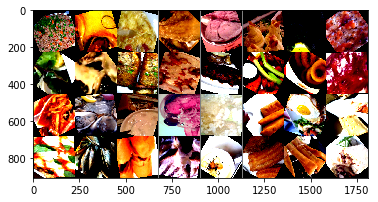

In [20]:
"""2.3"""

trainloader = torch.utils.data.DataLoader(trainset, batch_size=32,
shuffle=True, num_workers=2)

def imshow(img):
    img = img / 2 + 0.5
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))

dataiter = iter(trainloader)
images, labels = dataiter.next()
print(images.size())
imshow(torchvision.utils.make_grid(images))
#plt.show()

testloader = torch.utils.data.DataLoader(testset, batch_size=32,
shuffle=False, num_workers=2)

In [21]:
print('==> Training model..')

==> Training model..


In [22]:
#Set the model in training mode
#because some function like: dropout, batchnorm...etc, will have 
#different behaviors in training/evaluation mode
#[document]: https://pytorch.org/docs/stable/nn.html#torch.nn.Module.train

import time

since = time.time()

net.train()

for epoch in range(30):  # loop over the dataset multiple times
    running_loss = 0.0
    correct = 0
    for i, (inputs, labels) in enumerate(trainloader, 0):
        
        #change the type into cuda tensor 
        inputs = inputs.to(device) 
        labels = labels.to(device) 

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        # select the class with highest probability
        _, pred = outputs.max(1)
        # if the model predicts the same results as the true
        # label, then the correct counter will plus 1
        correct += pred.eq(labels).sum().item()
        
        loss = criterion(outputs, labels)
        
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 50 == 49:    # print every 50 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 50))
            running_loss = 0.0
    print('%d epoch, training accuracy: %.4f' % (epoch+1, 100.*correct/len(trainset)))
print('Finished Training')

time_elapsed = time.time() - since
print('Training complete in {:.0f}m {:.0f}s'.format(
    time_elapsed // 60, time_elapsed % 60))

[1,    50] loss: 2.684
[1,   100] loss: 1.886
[1,   150] loss: 1.620
[1,   200] loss: 1.365
[1,   250] loss: 1.461
[1,   300] loss: 1.432
1 epoch, training accuracy: 49.1993
[2,    50] loss: 1.304
[2,   100] loss: 1.326
[2,   150] loss: 1.308
[2,   200] loss: 1.286
[2,   250] loss: 1.290
[2,   300] loss: 1.331
2 epoch, training accuracy: 56.4261
[3,    50] loss: 1.262
[3,   100] loss: 1.226
[3,   150] loss: 1.218
[3,   200] loss: 1.194
[3,   250] loss: 1.156
[3,   300] loss: 1.210
3 epoch, training accuracy: 59.0918
[4,    50] loss: 1.177
[4,   100] loss: 1.184
[4,   150] loss: 1.120
[4,   200] loss: 1.131
[4,   250] loss: 1.153
[4,   300] loss: 1.166
4 epoch, training accuracy: 61.0278
[5,    50] loss: 1.185
[5,   100] loss: 1.054
[5,   150] loss: 1.121
[5,   200] loss: 1.110
[5,   250] loss: 1.137
[5,   300] loss: 1.130
5 epoch, training accuracy: 62.1123
[6,    50] loss: 1.073
[6,   100] loss: 1.075
[6,   150] loss: 1.121
[6,   200] loss: 1.037
[6,   250] loss: 1.085
[6,   300] loss

In [23]:
#After training , save the model first
#You can saves only the model parameters or entire model
#Some difference between the two is that entire model 
#not only include parameters but also record hwo each 
#layer is connected(forward method).
#[document]: https://pytorch.org/docs/master/notes/serialization.html

print('==> Saving model..')

#only save model parameters
torch.save(net.state_dict(), './transform_Lab2_1.t7')
#you also can store some log information
state = {
    'net': net.state_dict(),
    'acc': 100.*correct/len(trainset),
    'epoch': 100
}
torch.save(state, './transform_Lab2_1.t7')

print('Finished Saving')

==> Saving model..
Finished Saving


In [24]:
print('==> Testing model..')
net.eval()

==> Testing model..


DenseNet(
  (features): Sequential(
    (conv0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (norm0): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu0): ReLU(inplace)
    (pool0): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (denseblock1): _DenseBlock(
      (denselayer1): _DenseLayer(
        (norm1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu1): ReLU(inplace)
        (conv1): Conv2d(64, 128, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (norm2): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu2): ReLU(inplace)
        (conv2): Conv2d(128, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      )
      (denselayer2): _DenseLayer(
        (norm1): BatchNorm2d(96, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu1): ReLU(inplac

In [25]:
correct = 0
total = 0
class_correct = list(0. for i in range(11))
class_total = list(0. for i in range(11))
with torch.no_grad():
    for data in testloader:
        images, labels = data
        images = images.to(device) 
        labels = labels.to(device) 
        outputs = net(images)
        loss = criterion(outputs, labels)
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
        c = (predicted == labels).squeeze()
        for i in range(4):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1



print('Total accuracy is: %.1f %% and loss is: %.2f' % (
    100 * correct / total,loss))
for i in range(11):
    print('Accuracy of %5s : %.1f %%' % (
        classes[i], 100 * class_correct[i] / class_total[i]))

Total accuracy is: 78.9 % and loss is: 0.34
Accuracy of bread : 79.2 %
Accuracy of dairy products : 70.0 %
Accuracy of dessert : 85.7 %
Accuracy of   egg : 73.3 %
Accuracy of fried food : 70.5 %
Accuracy of  meat : 77.8 %
Accuracy of noodles & pasta : 78.8 %
Accuracy of  rice : 85.0 %
Accuracy of seefood : 83.3 %
Accuracy of  soup : 77.8 %
Accuracy of vegetables & fruits : 85.9 %
